# 모듈 임포트

In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
import matplotlib.pyplot as plt


# 데이터 스케일링 및 확인

(60000, 28, 28), (10000, 28, 28)


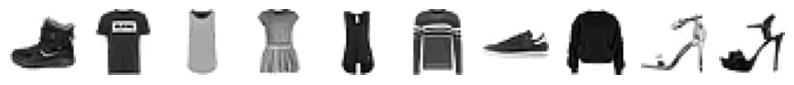

In [29]:
(input_train, target_train), (input_test, target_test) = fashion_mnist.load_data()

print(f"{input_train.shape}, {input_test.shape}")

input_scaled = input_train.astype('float32') / 255.
input_test_scaled = input_test.astype('float32') / 255.

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(input_train[i], cmap="gray_r")
    axs[i].axis('off')
plt.show()

# Auto Encoder 클래스 정의

In [30]:
latent_dim = 64

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()

        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([Flatten(), Dense(latent_dim, activation='relu')])
        self.decoder = tf.keras.Sequential([Dense(784, activation='sigmoid'), Reshape((28, 28))])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# 모델 생성 및 컴파일

In [31]:
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=MeanSquaredError(), metrics='accuracy')

# 모델 학습

In [32]:
autoencoder.fit(input_scaled, input_scaled,
                epochs=10, shuffle=True, validation_data=(input_test_scaled, input_test_scaled))

Epoch 1/10

1875/1875 [==============================] - 2s 780us/step - loss: 0.0233 - accuracy: 0.1168 - val_loss: 0.0132 - val_accuracy: 0.1547
Epoch 2/10
1875/1875 [==============================] - 1s 665us/step - loss: 0.0116 - accuracy: 0.1747 - val_loss: 0.0106 - val_accuracy: 0.1922
Epoch 3/10
1875/1875 [==============================] - 1s 668us/step - loss: 0.0100 - accuracy: 0.1987 - val_loss: 0.0097 - val_accuracy: 0.2075
Epoch 4/10
1875/1875 [==============================] - 1s 666us/step - loss: 0.0094 - accuracy: 0.2092 - val_loss: 0.0094 - val_accuracy: 0.2163
Epoch 5/10
1875/1875 [==============================] - 1s 678us/step - loss: 0.0092 - accuracy: 0.2153 - val_loss: 0.0092 - val_accuracy: 0.2198
Epoch 6/10
1875/1875 [==============================] - 1s 669us/step - loss: 0.0090 - accuracy: 0.2190 - val_loss: 0.0091 - val_accuracy: 0.2233
Epoch 7/10
1875/1875 [==============================] - 1s 655us/step - loss: 0.0089 - accuracy: 0.2217 - val_loss: 0.0089 

# 모델 테스트

In [33]:
encoded_imgs = autoencoder.encoder(input_test_scaled).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [34]:
encoded_imgs

print(encoded_imgs.shape)
print(decoded_imgs.shape)


(10000, 64)
(10000, 28, 28)


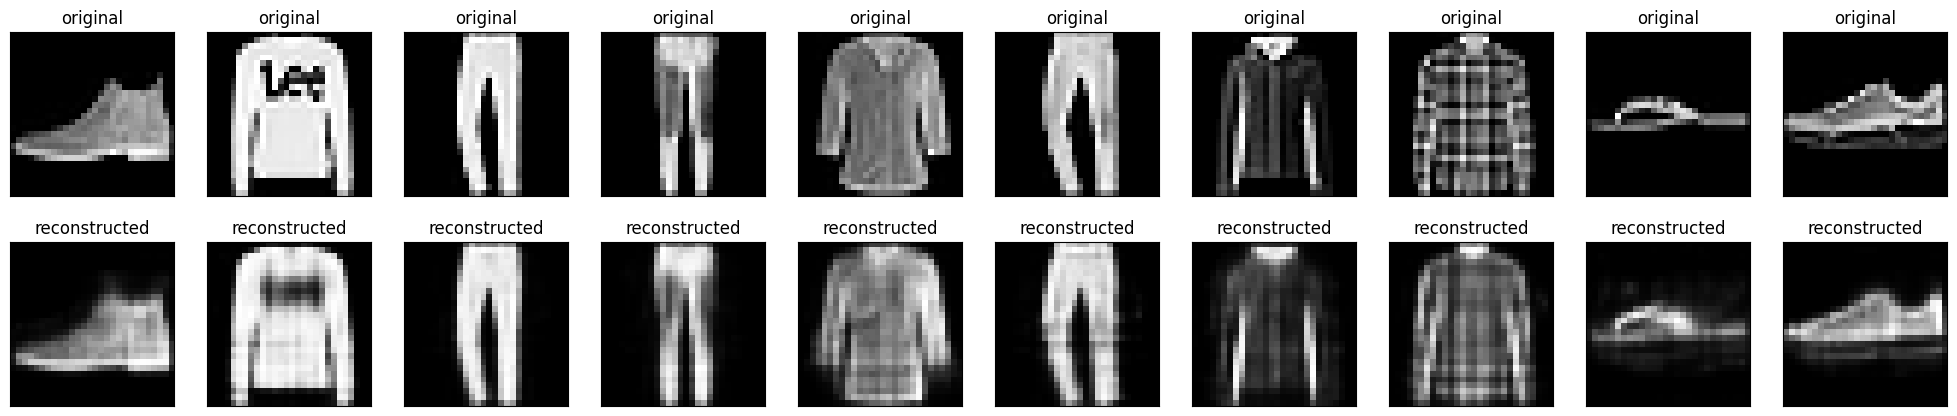

In [35]:
n = 10
plt.figure(figsize=(25, 5))

for i in range(10):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(input_test[i])
    plt.title('original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.title('reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [36]:
latent_dimension = 64

class stacked_Autoencoder(Model):
    def __init__(self, latent_dimension):
        super(stacked_Autoencoder, self).__init__()

        self.latent_dim = latent_dimension
        self.stacked_encoder = tf.keras.Sequential([
            Flatten(input_shape=[28, 28]), Dense(784, activation='relu'),
            Dense(784 // 2, activation='relu')
        ])
        self.stacked_decoder = tf.keras.Sequential([
            Dense(784 // 2, activation='relu'),
            Dense(784, activation='sigmoid'),
            Reshape([28, 28])
        ])

    def call(self, x):
        stacked_encoded = self.stacked_encoder(x)
        stacked_decoded = self.stacked_decoder(stacked_encoded)
        return stacked_decoded


In [37]:
st_autoencoder = stacked_Autoencoder(latent_dimension)
st_autoencoder.compile(optimizer='adam', loss=MeanSquaredError(), metrics='accuracy')

In [38]:
(input_train, target_train), (input_test, target_test) = fashion_mnist.load_data()

input_scaled = input_train.astype('float32') / 255.
input_test_scaled = input_test.astype('float32') / 255.

st_autoencoder.fit(input_scaled, input_scaled, epochs=10, shuffle=True,
                   validation_data = (input_test_scaled, input_test_scaled))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0156 - accuracy: 0.1604 - val_loss: 0.0091 - val_accuracy: 0.2225
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0081 - accuracy: 0.2403 - val_loss: 0.0071 - val_accuracy: 0.2601
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0066 - accuracy: 0.2714 - val_loss: 0.0064 - val_accuracy: 0.2799
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0058 - accuracy: 0.2919 - val_loss: 0.0057 - val_accuracy: 0.2917
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0053 - accuracy: 0.3057 - val_loss: 0.0054 - val_accuracy: 0.3109
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0050 - accuracy: 0.3161 - val_loss: 0.0051 - val_accuracy: 0.3223
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0047 - accuracy: 0.3253 - val_loss: 0.0049 - val_accuracy:

In [39]:
stacked_encoded_imgs = st_autoencoder.stacked_encoder(input_test_scaled).numpy()
stacked_decoded_imgs = st_autoencoder.stacked_decoder(stacked_encoded_imgs).numpy()

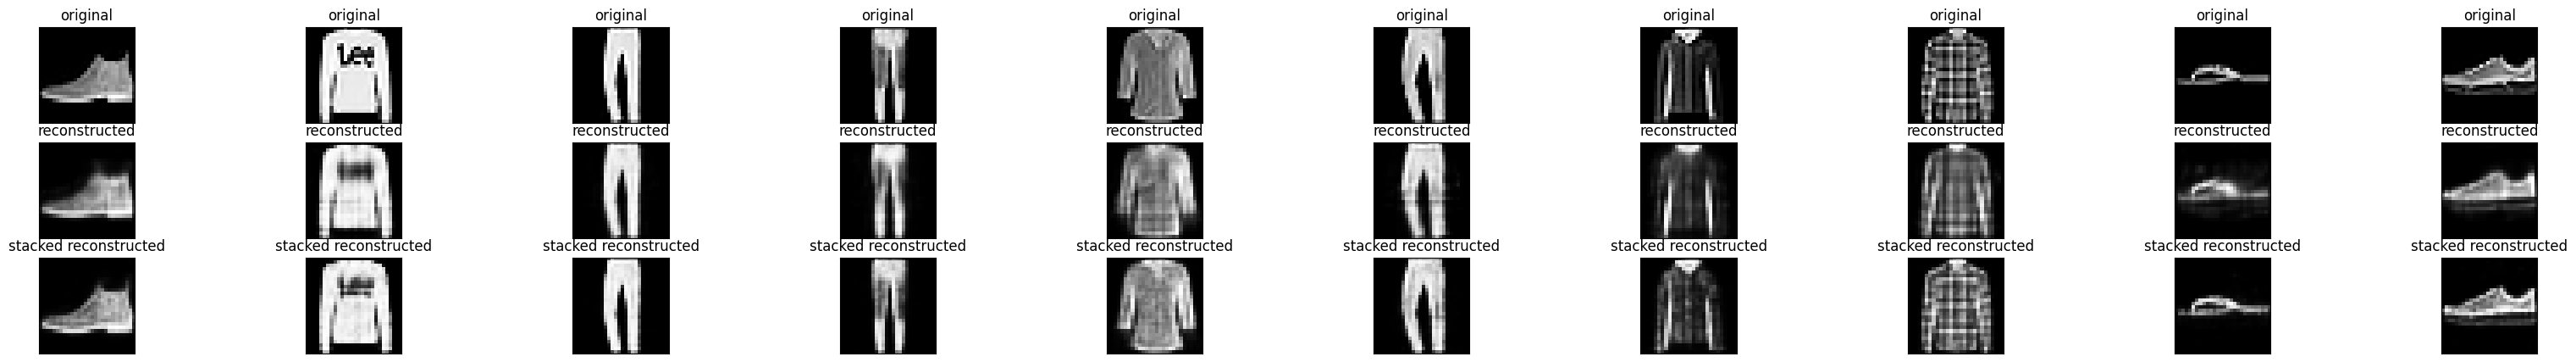

In [40]:
repeat_n = 10

plt.figure(figsize=(40, 5))

for i in range(repeat_n):
    ax = plt.subplot(3, repeat_n, i+1)
    plt.title('original')
    plt.imshow(input_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, repeat_n, i+1+repeat_n)
    plt.title('reconstructed')
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, repeat_n, i+1+(repeat_n + repeat_n))
    plt.title('stacked reconstructed')
    plt.imshow(stacked_decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()